# Image Preprocessing and Extracting features from tables


# Steps:
1. Get the file location of the images
2. Summary statistics of the images if possible

## Getting file path and file name
* Using ubuntu terminal to cd into the folder with the images of that category and use ls -1
* ls -1 limit output to 1 column
* copy and paste file name to excel column
* put the file path to the folder and the cateogry in the 2nd and 3rd column
* Ctrl + Shift + C for copying from terminal

* Saved "images_file_name.csv" in the EDA_Preprocessing folder

# Image file path

In [1]:
import pandas as pd

In [2]:
img = pd.read_csv('./images_file_name.csv')

In [3]:
img.head()

,file_name,folder,category
0,antsimage100.jpg,/home/eyan/Desktop/bug_bite/web_scraping/usefu...,ants
1,antsimage103.jpg,/home/eyan/Desktop/bug_bite/web_scraping/usefu...,ants
2,antsimage107.jpg,/home/eyan/Desktop/bug_bite/web_scraping/usefu...,ants
3,antsimage108.jpg,/home/eyan/Desktop/bug_bite/web_scraping/usefu...,ants
4,antsimage10.jpg,/home/eyan/Desktop/bug_bite/web_scraping/usefu...,ants


In [4]:
# seeing the count of each
img.groupby(['category']).describe()

file_name                                     folder         \
             count unique                     top freq  count unique   
category                                                               
ants           183    183   fire_antsimage203.jpg    1    183      1   
bed_bugs       152    152    bed_bugsimage118.jpg    1    152      1   
chiggers       165    165    chiggersimage299.jpg    1    165      1   
negative       263    263  goose_bumpimage406.jpg    1    263      1   
rash           276    276        rashimage589.jpg    1    276      1   
spiders        176    176   es_spidersimage80.jpg    1    176      1   
ticks          185    185    es_ticksimage282.jpg    1    185      1   

                                                                  
                                                        top freq  
category                                                          
ants      /home/eyan/Desktop/bug_bite/web_scraping/usefu...  183  
bed_bugs  /home/eyan/Desktop/bug_bite/web_scraping/usefu...  152  
chiggers  /home/eyan/Desktop/bug_bite/web_scraping/usefu...  165  
negative  /home/eyan/Desktop/bug_bite/web_scraping/usefu...  263  
rash      /home/eyan/Desktop/bug_bite/web_scraping/usefu...  276  
spiders   /home/eyan/Desktop/bug_bite/web_scraping/usefu...  176  
ticks     /home/eyan/Desktop/bug_bite/web_scraping/usefu...  185

In [12]:
# combine the two columns to get the file path
img["filepath"] = img["folder"]+"/"+ img["file_name"]
img_db = img.drop(columns=['folder','file_name'])

In [13]:
img_db.head()

,category,filepath
0,ants,/home/eyan/Desktop/bug_bite/web_scraping/usefu...
1,ants,/home/eyan/Desktop/bug_bite/web_scraping/usefu...
2,ants,/home/eyan/Desktop/bug_bite/web_scraping/usefu...
3,ants,/home/eyan/Desktop/bug_bite/web_scraping/usefu...
4,ants,/home/eyan/Desktop/bug_bite/web_scraping/usefu...


In [27]:
img_db.to_csv('./img_filepath.csv',index=False)

# Visualize count

In [28]:
import pandas as pd
img = pd.read_csv('./img_filepath.csv')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

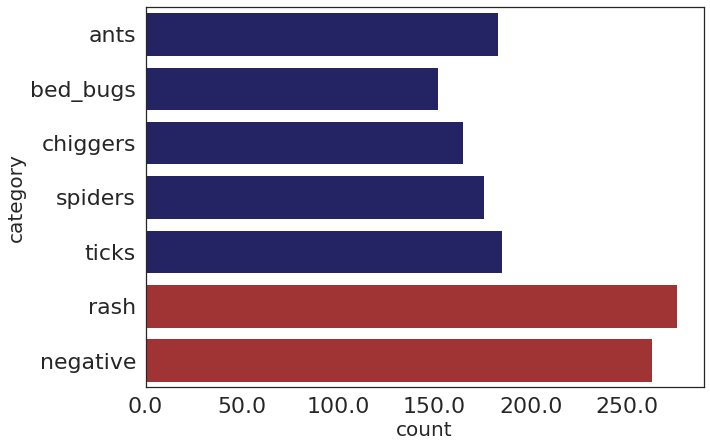

In [6]:
# this set the overall font size and image size
# style white has white background, no grid
sns.set(rc={'figure.figsize':(10,7),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")

# setting the color palette to use
color_pal = {category: "firebrick" if category== "negative" or category == "rash" else "midnightblue" for category in img.category.unique()}

# if I want to set the palette
# sns.set_palette("pastel")

# making a countplot with my defined palette
f = sns.countplot(data=img,y='category', palette=color_pal)

# setting the xtick labels size
f.set_xticklabels(f.get_xticks(), size = 22)

# since y label is text, need to first get the text then set the font size of the text instead of the numbers
# getting the lables
_, ylabels = plt.yticks()
# setting the font size of the y tick text
f.set_yticklabels(ylabels, size=22)

plt.show()

# Want to transform image to 299x299
* Seems like using tf preprocessing would be better, skip down

In [17]:
from PIL import Image
import PIL
import numpy as np
def load_image(image_path):
    img = Image.open( image_path )
    newImg = img.resize((299,299), PIL.Image.BILINEAR).convert("RGB")
    data = np.array( newImg.getdata() )
    return 2*( data.reshape( (newImg.size[0], newImg.size[1], 3) ).astype( np.float32 )/255 ) - 1

In [18]:
load_image(img.filepath[0])

array([[[ 0.47450984,  0.27058828,  0.1686275 ],
        [ 0.41176474,  0.20784318,  0.10588241],
        [ 0.39607847,  0.19215691,  0.09019613],
        ...,
        [ 0.09019613, -0.16862744, -0.2862745 ],
        [ 0.09019613, -0.16862744, -0.2862745 ],
        [ 0.09019613, -0.16862744, -0.2862745 ]],

       [[ 0.47450984,  0.27058828,  0.1686275 ],
        [ 0.41176474,  0.20784318,  0.10588241],
        [ 0.39607847,  0.19215691,  0.09019613],
        ...,
        [ 0.09019613, -0.16862744, -0.2862745 ],
        [ 0.09803927, -0.1607843 , -0.27843136],
        [ 0.09803927, -0.1607843 , -0.27843136]],

       [[ 0.45882356,  0.254902  ,  0.15294123],
        [ 0.4039216 ,  0.20000005,  0.09803927],
        [ 0.39607847,  0.19215691,  0.09019613],
        ...,
        [ 0.10588241, -0.15294117, -0.27058822],
        [ 0.10588241, -0.15294117, -0.27058822],
        [ 0.10588241, -0.15294117, -0.27058822]],

       ...,

       [[-0.96862745, -0.96862745, -0.96862745],
        [-0

# Resizing images using keras preprocessing
* https://www.tensorflow.org/tutorials/load_data/images

In [19]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [20]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
tf.__version__

'2.2.0'

In [36]:
import pathlib

data_dir = '/home/eyan/Desktop/bug_bite/web_scraping/useful'

data_dir = pathlib.Path(data_dir)

In [37]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1390

In [38]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['ants', 'chiggers', 'rash', 'negative', 'bed_bugs', 'spiders',
       'ticks'], dtype='<U8')

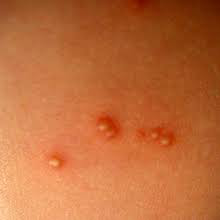

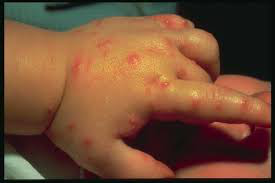

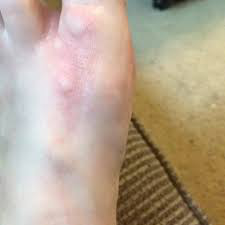

In [40]:
ants = list(data_dir.glob('ants/*'))

for image_path in ants[:3]:
    display.display(Image.open(str(image_path)))

In [41]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [48]:
BATCH_SIZE = 32
IMG_HEIGHT = 299
IMG_WIDTH = 299
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [49]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 1400 images belonging to 7 classes.


In [50]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

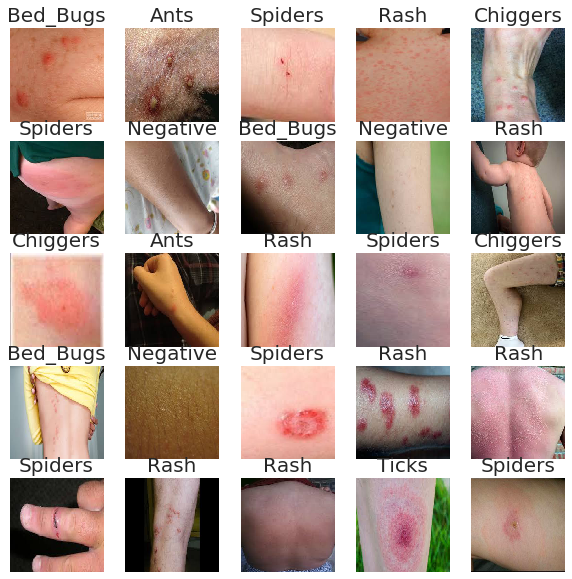

In [51]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

# Loading data as tf.data.Dataset

In [52]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
for f in list_ds.take(5):
  print(f.numpy())

b'/home/eyan/Desktop/bug_bite/web_scraping/useful/bed_bugs/bed_bugsimage308.jpg'
b'/home/eyan/Desktop/bug_bite/web_scraping/useful/ants/antsimage392.jpg'
b'/home/eyan/Desktop/bug_bite/web_scraping/useful/negative/goose_bumpimage191.jpg'
b'/home/eyan/Desktop/bug_bite/web_scraping/useful/bed_bugs/bed_bugsimage301.jpg'
b'/home/eyan/Desktop/bug_bite/web_scraping/useful/ticks/ticksimage184.jpg'


In [53]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [54]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [55]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [56]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [59]:
for image, label in labeled_ds.take(3):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (299, 299, 3)
Label:  [False False  True False False False False]
Image shape:  (299, 299, 3)
Label:  [False False False False False  True False]
Image shape:  (299, 299, 3)
Label:  [ True False False False False False False]


# Getting ready for training

In [60]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [61]:
train_ds = prepare_for_training(labeled_ds)

image_batch, label_batch = next(iter(train_ds))

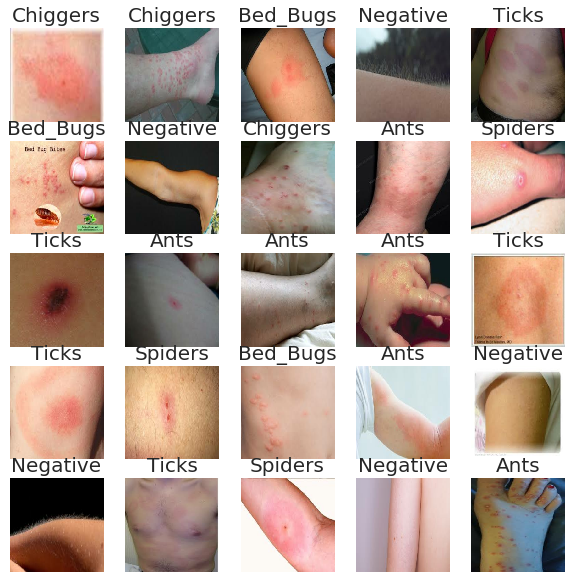

In [62]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [63]:
import time
default_timeit_steps = 1000

def timeit(ds, steps=default_timeit_steps):
  start = time.time()
  it = iter(ds)
  for i in range(steps):
    batch = next(it)
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))

In [64]:
# `keras.preprocessing`
timeit(train_data_gen)

....................................................................................................
1000 batches: 97.6436779499054 s
327.72219 Images/s


In [65]:
# `tf.data`
timeit(train_ds)

....................................................................................................
1000 batches: 27.85860252380371 s
1148.65776 Images/s


In [ ]:
# testing uncached
uncached_ds = prepare_for_training(labeled_ds, cache=False)
timeit(uncached_ds)

In [ ]:
# if dataset doesn't fit in memory then use a cache file
#filecache_ds = prepare_for_training(labeled_ds, cache="./flowers.tfcache")
#timeit(filecache_ds)